In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# reading the file of price and the size
#setting dataset into Pandas Dataframe


# for google colab
# from google.colab import files
# uploaded = files.upload()
df=pd.read_csv("realest.csv")

In [3]:
# applymap will be able to reach every element in dataframe
# "{:.2f}.format is for giving 2 decimal places"
# rstrip is for removing something
df = df.applymap(lambda x: "{:.2f}".format(round(x, 2)).rstrip('0').rstrip('.') if isinstance(x, (int, float)) else x)


In [5]:
df.head()

,Price,Size
0,39,539
1,42,601
2,43,701
3,45,719
4,46,758


In [6]:
df.tail()

,Price,Size
21,81,2104
22,82,2171
23,84,2173
24,85,2253
25,88,2267


In [7]:
df.dropna(subset=['Price'],inplace=True)
df

,Price,Size
0,39,539
1,42,601
2,43,701
3,45,719
4,46,758
5,48,759
6,50,771
7,53,776
8,57,782
9,59,828


In [8]:
# knowing about shape 

print("The rows x columns:")
print(df.shape)


The rows x columns:
(26, 2)


In [9]:
#finding duplicate values

print("Finding out duplicate values")
print(df.duplicated().sum())


Finding out duplicate values
0


In [10]:
# it will bw helpful 
# To analyse our data 
# when more depending factors are present

print("The Stastical value:")
print(df.describe())


The Stastical value:
       Price Size
count     26   26
unique    26   26
top       39  539
freq       1    1


In [11]:
# cleaning by this null values will be gone
# df = df.fillna(df.mean())
# Replace NaN values with mean

df.fillna(df.iloc[:, 0:1].mean(numeric_only=True), inplace=True)

In [12]:
# getting information it is also useful when 3 or more clumns present

print("Data information")
print(df.info())


Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   26 non-null     object
 1   Size    26 non-null     object
dtypes: object(2)
memory usage: 544.0+ bytes
None


In [21]:
# taking y as price and x as size
y = df.iloc[:, :-1].values
x = df.iloc[:, -1].values.reshape(-1, 1)  # Reshape to a 2D array

print(x)
print(y)

[['539']
 ['601']
 ['701']
 ['719']
 ['758']
 ['759']
 ['771']
 ['776']
 ['782']
 ['828']
 ['843']
 ['847']
 ['901']
 ['907']
 ['963']
 ['1082']
 ['1102']
 ['1278']
 ['1295']
 ['1979']
 ['2045']
 ['2104']
 ['2171']
 ['2173']
 ['2253']
 ['2267']]
[['39']
 ['42']
 ['43']
 ['45']
 ['46']
 ['48']
 ['50']
 ['53']
 ['57']
 ['59']
 ['60']
 ['61']
 ['63']
 ['64']
 ['65']
 ['67']
 ['69']
 ['70']
 ['72']
 ['73']
 ['80']
 ['81']
 ['82']
 ['84']
 ['85']
 ['88']]


In [22]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print(x_test)
print(y_test)

[['701']
 ['2045']
 ['963']
 ['1278']
 ['759']
 ['847']]
[['43']
 ['80']
 ['65']
 ['70']
 ['48']
 ['61']]


In [23]:
# training the model here

house_predict = LinearRegression()
house_predict.fit(x_train, y_train)

LinearRegression()

In [24]:
y_predict = house_predict.predict(x_test)
print(y_predict)

[[52.01690972]
 [81.63203914]
 [57.79009715]
 [64.73114311]
 [53.29494358]
 [55.23402943]]


In [26]:
#here predicting the output
#by just giving x_test to the model
# we are using .predict to get prediction
print("\n")
print(r2_score(y_test, y_predict))



0.7633711389075191


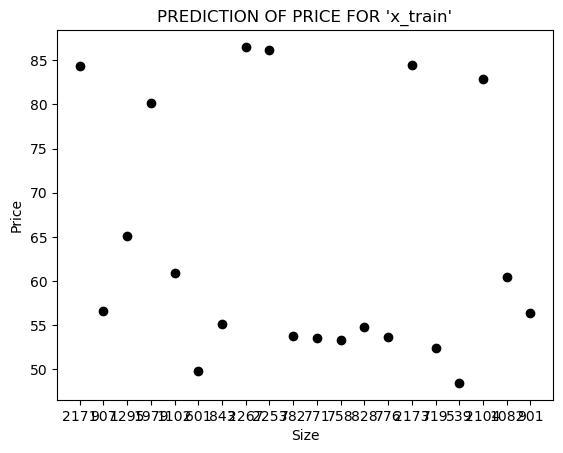

In [43]:
plt.scatter(x_train.flatten(), house_predict.predict(x_train).flatten(),color='black', label='Predicted')
plt.title("PREDICTION OF PRICE FOR 'x_train'")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()



In [44]:
print( house_predict.predict(x_train))
print(y_train)
print(x_train)

[[84.40845752]
 [56.55613343]
 [65.10573924]
 [80.17772475]
 [60.8529714 ]
 [49.81340307]
 [55.14588917]
 [86.52382391]
 [86.21533298]
 [53.80175011]
 [53.55936438]
 [53.27290851]
 [54.81536317]
 [53.66953971]
 [84.45252765]
 [52.41354092]
 [48.44722894]
 [82.93210806]
 [60.41227007]
 [56.42392303]]
[['82']
 ['64']
 ['72']
 ['73']
 ['69']
 ['42']
 ['60']
 ['88']
 ['85']
 ['57']
 ['50']
 ['46']
 ['59']
 ['53']
 ['84']
 ['45']
 ['39']
 ['81']
 ['67']
 ['63']]
[['2171']
 ['907']
 ['1295']
 ['1979']
 ['1102']
 ['601']
 ['843']
 ['2267']
 ['2253']
 ['782']
 ['771']
 ['758']
 ['828']
 ['776']
 ['2173']
 ['719']
 ['539']
 ['2104']
 ['1082']
 ['901']]


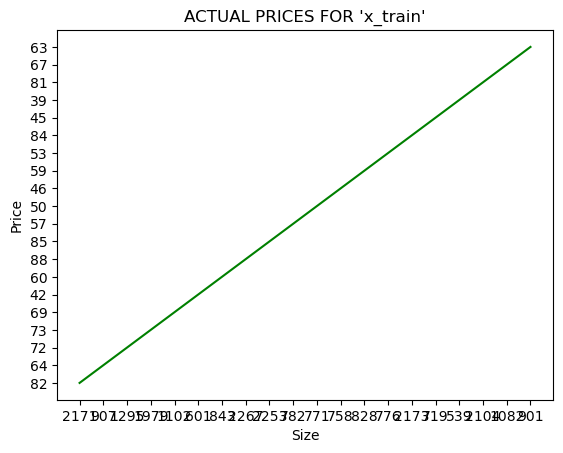

In [29]:
# Plotting the predicted values and actual values
plt.plot(x_train.flatten(), y_train.flatten(), color='green', label='Actual')
plt.title("ACTUAL PRICES FOR 'x_train'")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

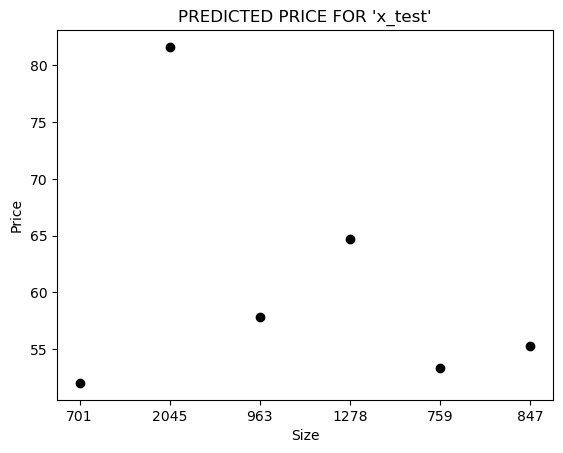

In [39]:
# plt.scatter(x_test.flatten(), y_test, color='green')
plt.scatter(x_test.flatten(), y_predict, color='black')
plt.title("PREDICTED PRICE FOR 'x_test'")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()


In [40]:
print(y_test)
print(y_predict)

[['43']
 ['80']
 ['65']
 ['70']
 ['48']
 ['61']]
[[52.01690972]
 [81.63203914]
 [57.79009715]
 [64.73114311]
 [53.29494358]
 [55.23402943]]


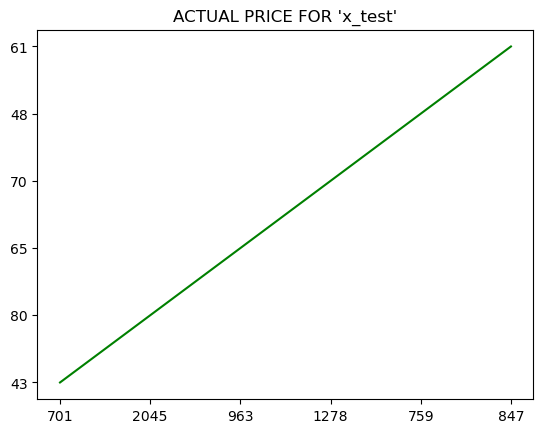

In [33]:

plt.plot(x_test.flatten(), y_test.flatten(), color='green')
plt.title("ACTUAL PRICE FOR 'x_test'")
plt.show()

In [41]:
print(house_predict.coef_)
print(house_predict.intercept_)

[[0.02203507]]
[36.57032808]


In [46]:
# price = 36.57032808 + 0.02203507S*size
prediction = house_predict.predict([[1]])
print(prediction)

[[36.59236315]]
